In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/home/hp/Downloads/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [295]:
df.shape

(159, 7)

In [296]:
df.size

1113

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [298]:
df.isna().sum().any()

False

In [299]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [300]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [301]:
#checking for balanced and inbalaneced
df1=df.groupby('Species')['Species'].count()
df1

Species
Bream        35
Parkki       11
Perch        56
Pike         17
Roach        20
Smelt        14
Whitefish     6
Name: Species, dtype: int64

In [302]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species'].unique()

array([0, 4, 6, 1, 2, 3, 5])

In [303]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [304]:
x=df.iloc[:,1:]
y=df.iloc[:,0]
x

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [305]:
print(x.ndim)

2


In [306]:
print(y.ndim)

1


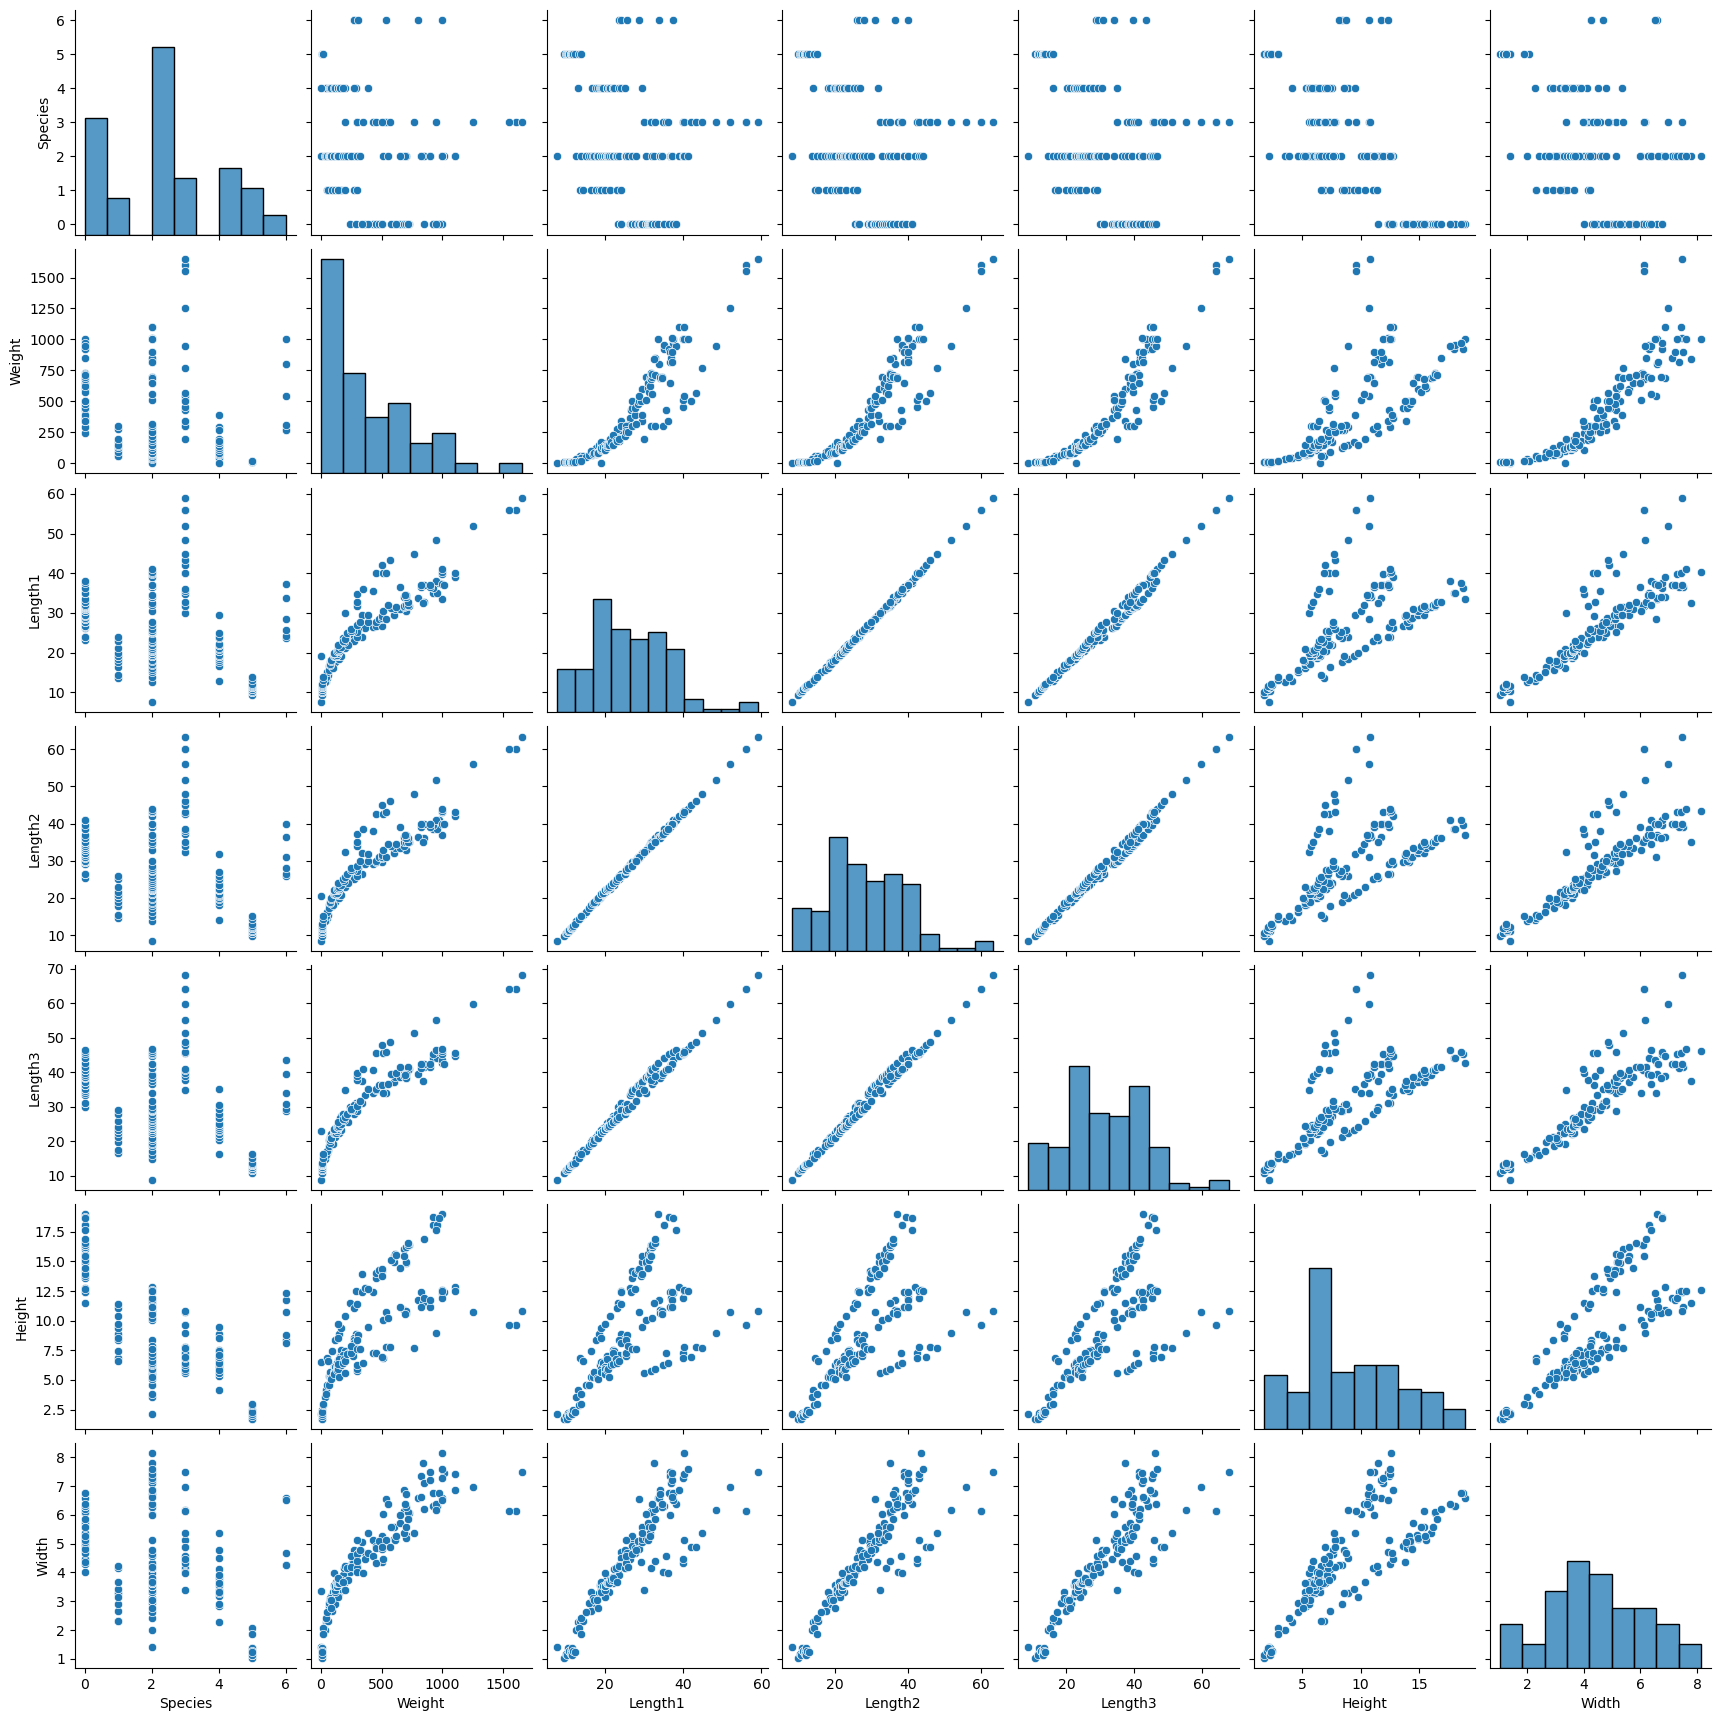

In [307]:
sns.pairplot(data=df)
plt.show()

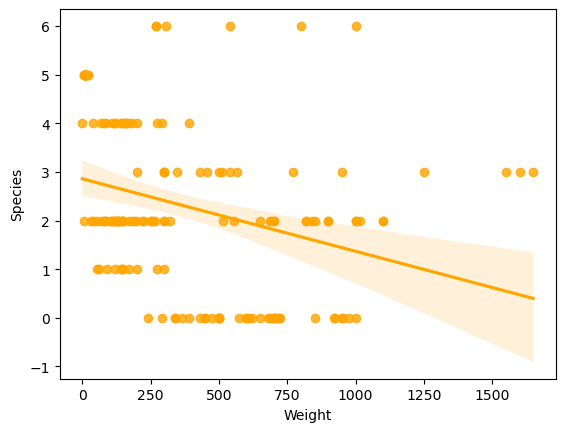

In [308]:
sns.regplot(x=df['Weight'],y=y,color='orange')
plt.show()

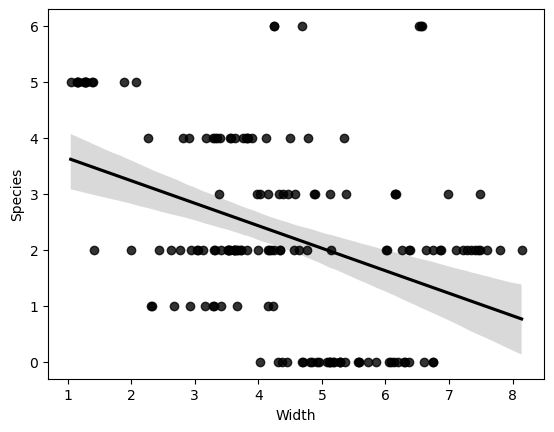

In [309]:
sns.regplot(x=df['Width'],y=y,color='black')
plt.show()

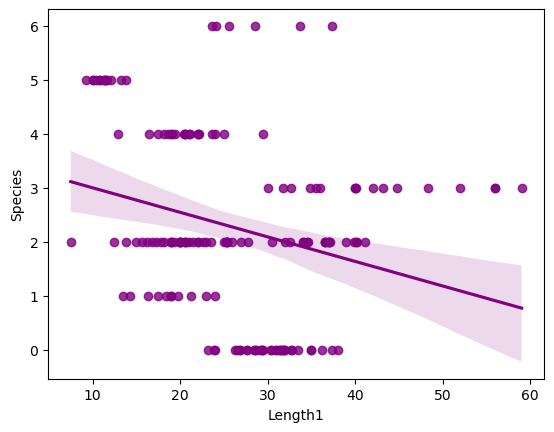

In [310]:
sns.regplot(x=df['Length1'],y=y,color='purple')
plt.show()

In [311]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print(x.shape,x_train.shape,x_test.shape)
# print(y_train)

(159, 6) (111, 6) (48, 6)


In [312]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[-0.8981661 , -0.97475417, -0.93705273, -1.05049157, -0.92993497,
        -0.82957981],
       [-1.07773972, -1.48673073, -1.52819479, -1.56455189, -1.62431045,
        -1.95628424],
       [-0.55903326,  0.35036163,  0.33906346,  0.291293  , -0.83745856,
        -0.67634703],
       [-0.36444885, -0.29211876, -0.2520786 , -0.2401931 , -0.1322507 ,
        -0.14653347],
       [-0.69802213, -0.55312642, -0.53357482, -0.60613434, -0.9250955 ,
        -0.52420791],
       [ 1.66478863,  0.70171809,  0.78007421,  0.97089817,  2.51982632,
         1.28457072],
       [-1.09553029, -1.64735083, -1.69709252, -1.73009674, -1.80023629,
        -2.02955891],
       [-0.61462881, -0.29211876, -0.32714425, -0.30989619, -0.45667039,
        -0.35408429],
       [-0.59239059, -0.39250632, -0.3834435 , -0.45801527, -0.54523511,
        -0.19623387],
       [ 2.35973297,  2.55888797,  2.5628836 ,  2.46080182,  0.44595254,
         1.51660719],
       [ 0.69186655,  0.45074919,  0.45166195,  0.

In [313]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred

array([ 2.0844277 ,  4.0408752 ,  2.67556548,  1.89477352,  2.96815035,
       -1.35560799,  4.60972272,  3.29514497,  2.54867926,  2.52434698,
        1.25962181,  2.43504066,  0.31230027,  1.41445401, -0.52516617,
       -1.19292754,  2.22347049,  2.79754552,  1.78822748,  0.64717015,
        4.59053277, -0.30942007,  0.20591318,  1.10890759, -1.24368079,
        2.31022656,  2.38042913,  2.10702713,  4.53084545,  4.48346195,
        3.20895492,  2.86324776,  3.12794516,  2.37769774,  0.80983194,
        2.15133269,  2.85743918,  3.38384362,  0.69856102,  2.39517053,
        0.07588586,  2.81642371,  4.53031032,  3.05577313,  1.5605536 ,
        2.94365336,  2.56909236, -0.53835469])

In [314]:
print(reg.predict([[6.7,9.3,9.8,10.8,1.7388,1.0476]]))

[-0.46370493]


In [315]:
print('Constant values is',reg.intercept_)
print('Slope',reg.coef_)

Constant values is 2.2522522522522466
Slope [  0.63289376  12.33977477 -20.73016047   7.82147397  -2.64312169
   1.49223276]


In [316]:
print('Constant values is ',reg.intercept_)
print('Coefficient')
x=list(zip(x,reg.coef_))
x

Constant values is  2.2522522522522466
Coefficient


[('Weight', 0.632893759683104),
 ('Length1', 12.33977476567362),
 ('Length2', -20.730160474072193),
 ('Length3', 7.821473972545427),
 ('Height', -2.64312169055579),
 ('Width', 1.4922327634329537)]

In [317]:
r2score=r2_score(y_test,y_pred)
r2score

0.6165224139667376

In [318]:
df=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred})
df

,Actual_value,Predicted_value
78,2,2.084428
155,5,4.040875
128,3,2.675565
55,6,1.894774
94,2,2.968150
29,0,-1.355608
147,5,4.609723
51,4,3.295145
98,2,2.548679
141,3,2.524347


In [319]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute Error:',mean_absolute_error(y_test,y_pred))

Mean absolute Error: 0.8054322488344731


In [320]:
from sklearn.metrics import mean_absolute_percentage_error
print('Mean absolute percentage error:',mean_absolute_percentage_error(y_test,y_pred))

Mean absolute percentage error: 899292662730739.4


In [321]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE =",mse)
print("RMSE =",rmse)

MSE = 1.3894404896726018
RMSE = 1.178745303139148
